#### Advanced machine learning usng scikit learn by Andreas Muller

In [ ]:
import IPython
IPython.__version__

import numpy as np
np.__version__

import matplotlib
matplotlib.__version__

import sklearn
sklearn.__version__

In [ ]:
import pandas as pd
pd.__version__

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Get some data to play with

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

In [ ]:
digits.images.shape

In [ ]:
digits.target.shape

In [ ]:
digits.target

#### Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)

In [ ]:
digits.images[0]

In [ ]:
plt.imshow(digits.images[0], cmap=plt.cm.Greys)

In [ ]:
digits.data.shape

In [ ]:
#split the data to get going
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=0.1)
svm.fit(X_train, y_train)

In [ ]:
print(svm.predict(X_train))
print(y_train)

In [ ]:
svm.score(X_train, y_train) #computes accuracy fraction of correctly predicted data

In [ ]:
svm.score(X_test, y_test)

In [ ]:
#change the algorithm to soemthing else
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=1)
rfc.fit(X_train, y_train)

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
rfc.predict(X_test)

In [ ]:
rfc.score(X_train, y_train)

In [ ]:
rfc.score(X_test, y_test)

In [ ]:
numbers = np.array(["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"])

In [ ]:
y_train_string = numbers[y_train]
svm.fit(X_train, y_train_string)

In [ ]:
svm.predict(X_test)

#### Regression

#### Load the Boston Data

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

In [ ]:
print(boston.DESCR)

In [ ]:
boston.data.shape

In [ ]:
boston.target.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

#### Learning Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

pred_test = ridge.predict(X_test)
pred_test

In [ ]:
ridge.score(X_train, y_train)

In [ ]:
ridge.score(X_test, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)
mean_squared_error(y_test, rfr.predict(X_test))

### Transformers - Unsupervised transformation for preprocessing

In [ ]:
np.set_printoptions(suppress=True)
print(X_train)

In [ ]:
print("mean: %s " % X_train.mean(axis=0))

In [ ]:
print("Standard deviation: %s " % X_train.std(axis=0))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
X_scaled = scaler.transform(X_train)

In [ ]:
print(X_scaled)

In [ ]:
print(X_scaled.shape)

In [ ]:
print("mean %s" % X_scaled.mean(axis=0)) #mean = 0 and std = 1 for data

In [ ]:
print("std %s" % X_scaled.std(axis=0))

In [ ]:
#### Clustering
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
X.shape

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)
cluster_labels

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = cluster_labels)

In [ ]:
y

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y, cluster_labels)

In [ ]:
confusion_matrix(y, cluster_labels)

In [ ]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, cluster_labels)

In [ ]:
#not all clustering models in scikit learn has predict method but kmeans has

X_more = np.random.uniform(X.min(), X.max(), size=(10, 2))
X_more
more_clusters_labels = kmeans.predict(X_more)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
plt.scatter(X_more[:, 0], X_more[:, 1], marker='x', c= more_clusters_labels)

In [ ]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=3, gamma=0.1)

In [ ]:
spectral_clustering.fit(X)

In [ ]:
cluster_labels = spectral_clustering.predict(X)

In [ ]:
spectral_clustering.labels_

In [ ]:
cluster_labels = spectral_clustering.fit_predict(X)

In [ ]:
plt.scatter(X[:,0], X[:, 1], c= cluster_labels)

In [ ]:
#### A less trivial example:

X, y = digits.data, digits.target

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

In [ ]:
adjusted_rand_score(y, kmeans.predict(X))

In [ ]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8,8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

#### Manifold learning

In [ ]:
from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000)
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], c = y)
ax.view_init(10, -60)

In [ ]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=20)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c = y)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y)

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=5)
X, y = digits.data, digits.target

In [ ]:
X_tsne = TSNE().fit_transform(X)
plt.scatter(X_tsne[:, 0], X[:, 1], c = y)

#### Cross validation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target
n_samples = X.shape[0]

print(X.shape)
print(y.shape)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y)
print(scores)
print(np.mean(scores))

In [ ]:
cross_val_score(classifier, X, y, cv=5)

#### Custom cross validation iterators

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

In [ ]:
from sklearn.cross_validation import KFold, StratifiedKFold, ShuffleSplit, LeavePLabelOut

In [ ]:
cv = StratifiedKFold(iris.target, n_folds = 5)
for train, test in cv:
    print(test)

In [ ]:
def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    plt.matshow(masks)

In [ ]:
cv = StratifiedKFold(y, n_folds=5)
plot_cv(cv, n_samples)

In [ ]:
#standard K fold
cv = KFold(n_samples, n_folds=5)
plot_cv(cv, n_samples)

In [ ]:
cv = ShuffleSplit(n_samples, n_iter=5, test_size=0.2)
plot_cv(cv, n_samples)

In [ ]:
cv = KFold(n_samples, n_folds=10)
plot_cv(cv, n_samples)

In [ ]:
cv = ShuffleSplit(n_samples, n_iter=5, test_size=0.2)
plot_cv(cv, n_samples)

In [ ]:
cv = ShuffleSplit(n_samples, n_iter=20, test_size=0.2)
plot_cv(cv, n_samples)

In [ ]:
cv = ShuffleSplit(n_samples, n_iter=5, test_size=0.2)
cross_val_score(classifier, X, y, cv=cv)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### GridSearch

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
from sklearn.svm import SVC
Cs = [0.01, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]

In [ ]:
from sklearn.cross_validation import cross_val_score
for C in Cs:
    for gamma in gammas:
        scores = cross_val_score(SVC(C=C, gamma=gamma), X, y)
        print("C: %f, gamma: %f, average score: %f" % (C, gamma, np.mean(scores)))

In [ ]:
from sklearn.grid_search import GridSearchCV

param_grid = {'C': Cs, 'gamma': gammas}

print(param_grid)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid=param_grid)

In [ ]:
grid_search.fit(X, y)

In [ ]:
grid_search.best_score_

In [ ]:
scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(5,4)

plt.imshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(4), param_grid['gamma'])
plt.yticks(np.arange(5), param_grid['C']);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.predict(X_test)

In [ ]:
grid_search.score(X_test, y_test)

In [ ]:
cross_val_score(grid_search, X, y, cv=5)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from figures import plt_kneighbors_regularization
plot_kneighbors_regularization()

In [ ]:
import numpy as np
from PIL import Image

In [ ]:
def display_image(x):
    x_scaled = np.uint8(255 * (x - x.min()) / (x.max() - x.min())) 
    return Image.fromarray(x_scaled)

In [ ]:
display_image(np.random.rand(200, 200))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from IPython.display import FileLink, FileLinks
file = FileLink("Basic_ML.ipynb")

In [ ]:
file

### Linear Model for Regression:

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [ ]:
X, y, true_coefficient = make_regression(n_samples=80, 
                                         n_features = 30, 
                                         n_informative=10, 
                                         noise=100, 
                                         coef=True,
                                         random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
print("R^2 on training set: %f" % linear_regression.score(X_train, y_train))
print("R^2 on test set: %f" % linear_regression.score(X_test, y_test))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

In [ ]:
plt.figure(figsize=(10, 5))
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], "o", label='liean regression')

plt.legend()

#### Ridge Regression (L2 Penalty)

In [ ]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge
    
plt.plot(training_scores, label='training scores')
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc='best')

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o",
         label="true", c="b")

for i, alpha in enumerate([100, 10, 1, 0.01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], "o", 
             label="alpha = %.2f" % alpha, 
             c = plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

#### Lasso (L1 penalty)

In [ ]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, 0.01]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso
    
plt.plot(training_scores, label="Training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [30, 10, 1, 0.01])
plt.legend(loc='best')

### Linear model for clasification

In [ ]:
#The influence of c in linearSVC

from figures import plot_linear_svc_regularization
plot_lienar_svc_regularization()

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], c = y)

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

import numpy as np
plt.scatter(X[:, 0], X[:, 1], c = y)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Support Vector Machine - for classification

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [ ]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data/16., 
                                                    digits.target % 2, random_state=1)

In [ ]:
from sklearn.svm import LinearSVC, SVC
linear_svc = LinearSVC(loss='hinge').fit(X_train, y_train)
svc = SVC(kernel='linear').fit(X_train, y_train)

In [ ]:
np.mean(linear_svc.predict(X_test) == svc.predict(X_test))

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
line = np.linspace(-3, 3, 100)[:, np.newaxis]
kernel_value = rbf_kernel([[0]], line, gamma=1)
plt.plot(line, kernel_value.T)

In [ ]:
from figures import plot_svm_interactive
plot_svm_interactive()

In [ ]:
svc = SVC().fit(X_train, y_train)
svc.score(X_test, y_test)

In [ ]:
Cs = [0.001, 0.01, 0.1, 10, 100]
gammas = [0.001, 0.01, 0.1, 10, 100]

from sklearn.grid_search import GridSearchCV

param_grid = {'C': Cs, 'gamma': gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
#We extract just the scores

scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(5, 5)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')

plt.colorbar()
plt.xticks(np.arange(6), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);

### Decisoon Trees - Random Forest

In [ ]:
from figures import plot_interactive_tree
plot_interactive_tree()

### Random Forest

In [ ]:
from figures import plot_forest_interactive
plot_tree_ineractive()

#### Selecting the optimal estimator via cross validation

In [ ]:
from sklearn import grid_search
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
parameters = {'max_features': ['sqrt', 'log2'],
              'max_depth': [5, 7, 9]}

clf_grid = grid_search.GridSearchCV(rf, parameters)
clf_grid.fit(X_train, y_train)

In [ ]:
#### Learning Curves for analyzing models
from figures import make_dataset

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for n_samples, ax in zip([10, 100, 500], axes .ravel()):
    X, y = make_dataset(n_samples=n_samples)
    ax.scatter(X, y)
    ax.set_xticks(())
    ax.set_yticls(())

In [ ]:
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import KFold
from sklearn.linear_model import Ridge

from sklearn.datasets import load_boston
boston = load_boston()
#print (boston.DESCR) to learn more about the dataset
cv = KFold(n_folds = 10, n = len(boston.data), shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(Ridge(alpha=1), 
                                                              boston.data, 
                                                              boston.target,
                                                              cv = cv)
print("dataset size: %d" %  boston.data.shape[0])
print("training set sizes: %s" % train_sizes)

In [ ]:
train_scores.shape

In [ ]:
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                    train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, 
                    validation_scores_mean + validation_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Cross Validation score')
    
    plt.ylim(max(-3, validation_scores_mean.min(), - .1), train_scores_mean.max() + .1)

In [ ]:
plot_learning_curve(train_sizes, train_scores, validation_scores)

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(Ridge(alpha=0.001), 
                                                              boston.data, 
                                                              boston.target, 
                                                              cv = cv)

In [ ]:
plot_learning_curve(train_sizes, train_scores, validation_scores)

### Validation curves

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.learning_curve import validation_curve

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target

In [ ]:
training_scores, validation_scores = validation_curve(RandomForestClassifier(n_estimators=50, n_jobs = -1), X, y, param_name="max_depth", param_range=range(1, 10), cv = 5)

In [ ]:
training_scores

In [ ]:
training_scores.shape

In [ ]:
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    
    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color='r')
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                    validation_scores_mean + validation_scores_std, alpha=0.1, color='g')
    
    plt.plot(parameter_values, train_scores_mean, 'o-', color='g', 
             label='Training scores')
    
    plt.plot(parameter_values, validation_scores_mean, 'o-', color='g',
            label='cross_validation_score')
    
    plt.ylim(validation_scores_mean.min() - 0.1, train_scores_mean.max() + 0.1)
    plt.legend(loc='best')

In [ ]:
plot_validation_curve(range(1, 10), training_scores, validation_scores)

In [ ]:
from sklearn.svm import LinearSVC
Cs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
training_scores, test_scores = validation_curve(LinearSVC(), X, y, param_name = "C", param_range=Cs)

In [ ]:
plot_validation_curve(range(7), training_scores, test_scores)
plt.xticks(range(7), Cs);

#### EstimatorCV objects for efficient parameter search
Lets determine best features based on number of features we want to keep. This iteratively keep eliminating features with lowest coeffcients until it keeps
only the # of mentioned features are kept.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

feature_elimination_lr = RFE(LogisticRegression(C=100), n_features_to_select=2)

In [ ]:
feature_elimination_lr.fit(X_train, y_train)
feature_elimination_lr.score(X_test, y_test)

In [ ]:
from sklearn.grid_search import GridSearchCV

param_grid = {'n_features_to_select': np.arange(1, 5)}
#print(param_grid['n_features_to_select'])
grid_search = GridSearchCV(feature_elimination_lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

In [ ]:
grid_search.best_params_

In [ ]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(LogisticRegression(C=100)).fit(X_train, y_train)
rfecv.score(X_test, y_test)

In [ ]:
rfecv.n_features_

#### Efficient hyper parameter selection for Lasso

In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(noise=60, random_state=0)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
lasso = Lasso().fit(X_train, y_train)
print("lasso score with default alpha: %f" % lasso.score(X_test, y_test))

lassocv = LassoCV().fit(X_train, y_train)
print("lasso score with automatic alpha: %f" % lassocv.score(X_test, y_test))

In [ ]:
grid_search = GridSearchCV(Lasso(), param_grid={'alpha': np.logspace(-5, 1, 20)}, cv = 5)
grid_search.fit(X_train, y_train)
print('Lasso score with grid-searched alpha: %f' % grid_search.score(X_test, y_test))

In [ ]:
print(grid_search.best_score_)

In [ ]:
grid_search.best_estimator_

In [ ]:
print("best alpha found by LassoCV: %f" % lassocv.alpha_)
print("best alpha found by GridSearchCV: %f" % grid_search.best_params_['alpha'])

In [ ]:
%timeit Lasso().fit(X_train, y_train)

In [ ]:
%timeit LassoCV().fit(X_train, y_train)

#### Pipelines in scikit learn

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(random_state=12, noise=100)
print(X_train.shape)

In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(noise=60, random_state=0)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.feature_selection import SelectFpr, f_regression
from sklearn.linear_model import Ridge

fpr = SelectFpr(score_func=f_regression, alpha=0.05)
fpr.fit(x_train, y_train)
X_train_fpr = fpr.transform(X_train)
X_test_fpr = fpr.transform(X_test)

print(X_train.shape)

In [ ]:
ridge = Ridge()
ridge.fit(X_train_fpr, y_train)
ridge.score(X_test_fpr, y_test)

### How not to do grid searches

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = {"alpha": np.arange(-3,5)}
grid = GridSearchCV(ridge, param_grid, cv=5).fit(X_train_fpr, y_train)
print('test set accuracy: %.2f' % grid.score(X_test_fpr, y_test))

### A more extreme example

In [ ]:
rng = np.random.RandomState(0)
y = rng.rand(X.shape[0])
X_train_fpr, X_test_fpr, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.4)

grid.fit(X_train_fpr, y_train)
print("best cross-validation score: %.2f" % grid.best_score_)
print("test set accuracy: %.2f" % grid.score(X_test_fpr, y_test))

### Pipelines

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

svm = SVC().fit(X_train_scaled, y_train)

In [ ]:
from sklearn.Pipeline import Pipeline

pipe = Pipeline([('my_scaler', StandardScaler()), ("my_svm", SVC())])
pipe.fit(X_train, y_train);

In [ ]:
pipe.score(X_test, y_test)

In [ ]:
pipe.decision_function(X_train).shape

In [ ]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), SVC())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

In [ ]:
from sklearn.feature_extraction import SelectFdr, VarianceThreshold

pipe = make_pipeline(VarianceThreshold(), StandardScaler(), SelectFdr(), SVC())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

### Unsupervised pipeline

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

cluster_pipe = make_pipeline(PCA(n_components=10), Kmeans(n_clusters=10))
cluster_pipe.fit(X_train)
cluster_pipe.predict(x_train)

In [ ]:
### Accessing attributes

cluster_pipe.names_steps['pcs']

In [ ]:
cluster_pipe.names_steps['kmeans']

In [ ]:
cluster_pipe.named_steps['kmeans'].cluster_centers_.shape

In [ ]:
cluster_pipe = Pipeline([('my_pca', PCA(n_components=10)), ('my_clustering', KMeans(n_clusters=10))])
cluster_pipe.fit(X_train)

### Cross validation with pipeline

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

### Without pipelines

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

cross_val_score(SVC(), X_train_scaled, y_train)

### With pipelines no contamination

In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), SVC())
cross_val_score(pipe, X_train, y_train)

### Using pipeline with grid_search

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(random_state=1, effective_rank=90)
print(X.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)

In [ ]:
#selectFpr: Filter: Select the pvalues below alpha based on a FPR test.
# FPR test stands for False Positive Rate test. 
#It controls the total amount of false detections
from sklearn.feature_selection import SelectFpr, f_regression
from sklearn.linear_model import Ridge

fpr = SelectFpr(score_func=f_regression)
fpr.fit(X_train, y_train)
X_train_fpr = fpr.transform(X_train)
X_test_fpr = fpr.transform(X_test)

print(X_train_fpr.shape)

In [ ]:
ridge = Ridge()
ridge.fit(X_train_fpr, y_train)
ridge.score(X_test_fpr, y_test)

### With pipelines

In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SelectFpr(score_func=f_regression), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

In [ ]:
from sklearn.grid_search import GridSearchCV
import numpy as np
#without pipeline
param_grid_no_pipeline = {'alpha': 10. ** np.arange(-3, 3)}

In [ ]:
pipe.named_steps.keys()

In [ ]:
#with pipeline
param_grid = {'ridge__alpha': 10. ** np.arange(-3, 5)}
grid = GridSearchCV(pipe, param_grid, cv =10)
grid.fit(X_train, y_train)

In [ ]:
grid.score(X_test, y_test)

In [ ]:
grid.best_params_

#### Selecting parameters of the preprocessing steps

In [ ]:
param_grid = {'ridge__alpha': 10. ** np.arange(-3, 5),
             'selectfpr__alpha': [0.01, 0.02, 0.05, 0.1, 0.3]}
grid = GridSearchCV(pipe, param_grid, cv=10)
print(X_train.shape)
print(y_train.shape)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

In [ ]:
grid.best_params_

In [ ]:
final_selectfpr = grid.best_estimator_.named_steps['selectfpr']
final_selectfpr.get_support()

### Default metrics

In [ ]:
rng = np.random.RandomState(42)
X = rng.uniform(size=(30,1))
a = rng.normal(scale=10)
b = rng.normal()

y_clean = np.dot(X, a).ravel() + b
y = y_clean + rng.normal(size=len(y_clean))
plt.plot(X[:, 0], y, 'x')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X, y)
y_pred = lr.predict(X)
plt.plot(X[:, 0], y, 'x')
plt.plot(X[:, 0], y_pred)

In [ ]:
print("training set R^2: %f" % r2_score(y, y_pred))
print("training set MSE: %f" % mean_squared_error(y, y_pred))

In [ ]:
from sklearn.cross_validation import cross_val_score, LeaveOneOut
cv = LeaveOneOut(len(y)) #small test set should be avoided for r2 score
cross_val_score(LinearRegression(), X, y, cv=cv)

### Classification

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier #ignores X and guesses y randomly

n_classes = 5
X, y = make_blobs(centers=n_classes, n_samples = 10000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dummy = DummyClassifier(random_state=42).fit(X_train, y_train)
print("Chance accuracy for %d classes: %.1f" % (n_classes, dummy.score(X_test, y_test)))

In [ ]:
dummy = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
print("Accuracy for 9:1 imbalanced clasification predicting majority: %.2f" 
      % dummy.score(X_test, y_test))

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = LinearSVC(random_state=1).fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

print("Accuracy: %f" % classifier.score(X_test, y_test))

In [ ]:
#### Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

In [ ]:
plt.imshow(confusion_matrix(y_test, y_test_pred), 
           cmap="coolwarm", 
           interpolation="None")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.xticks(range(10))
plt.yticks(range(10))
plt.ylabel("True label")

### Binary tasks

In [ ]:
y_even = y % 2
X_train, X_test, y_train, y_test = train_test_split(X, y_even, random_state=42)

classifier = LinearSVC().fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_test_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

### Precision recall trade-offs and Area Under The Curve

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

digits = load_digits()
X, y = digits.data, digits.target % 2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
svm = LinearSVC(random_state=2).fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["even", "odd"]))

In [ ]:
decision_function = svm.decision_function(X_test)
y_pred_2 = decision_function > -2
print(classification_report(y_test, y_pred_2, target_names=["even", "odd"]))

In [ ]:
decision_function = svm.decision_function(X_test)
y_pred_2 = decision_function > -2
print(classification_report(y_test, y_pred_2, target_names=["even", "odd"]))

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, decision_function)
plt.plot(precision, recall)
plt.xlabel("precision")
plt.ylabel("recall")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

X, y = digits.data, digits.target == 3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for gamma in [0.01, 0.05, 1]:
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate (recall)")
    svm = SVC(gamma = gamma).fit(X_train, y_train)
    decision_function = svm.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, decision_function)
    acc = svm.score(X_test, y_test)
    auc = roc_auc_score(y_test, svm.decision_function(X_test))
    plt.plot(fpr, tpr, label="gamma: %.2f accuracy:%.2f auc: %.2f" % (gamma, acc, auc), linewidth=2)
plt.legend(loc=(0, 1))

### Built in custom scoring functions

In [ ]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

X, y = make_classification(random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(lr.score(X_test, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

In [ ]:
from sklearn.metrics import precision_score, f1_score
print("precision: %f f1_score: %f" % (precision_score(y_test, pred), f1_score(y_test, pred)))

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
probs = lr.predict_proba(X_test)[:,1]

print("area under the roc curve: %f" % roc_auc_score(y_test, probs))
print("average precision: %f"  % average_precision_score(y_test, probs))
print("Log loss: %f" % log_loss(y_test, probs))

### scores for cross-validation and grid search

In [ ]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), X, y)

In [ ]:
print("Accuracy scoring: %s" % cross_val_score(LogisticRegression(), X, y, scoring="accuracy"))
print("F1 scoring: %s" % cross_val_score(LogisticRegression(), X, y, scoring="f1"))
print("AUC scoring: %s" % cross_val_score(LogisticRegression(), X, y, scoring="roc_auc"))
print("Negative Log Loss scoring % s" % cross_val_score(LogisticRegression(), X, y, scoring='neg_log_loss'))

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = {'C': np.logspace(start=-3, stop=3, num=10)}
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='neg_log_loss')
grid_search.fit(X, y)

In [ ]:
grid_search.grid_scores_

### Define your own scoring callable

In [ ]:
def my_accuracy_scoring(est, X, y):
    return np.mean(est.predict(X) == y)

print(cross_val_score(LogisticRegression(), X, y))
print(cross_val_score(LogisticRegression(), X, y, scoring=my_accuracy_scoring))

### From a score function

In [ ]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, pred, beta=10)

### Accessing the estimator

In [ ]:
def my_sparse_scoring(est, X, y):
    return np.mean(est.predict(X) == y) - np.mean(est.coef_ != 0)

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import LinearSVC

grid = GridSearchCV(LinearSVC(C=.01, dual=False),       
                  param_grid = {'penalty': ['l1', 'l2']},
                  scoring=my_sparse_scoring)

grid.fit(X, y)
print(grid.best_params_)

### How to evaluate unsupervised models

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces(shuffle=True, random_state=0)
faces = dataset.data
faces.shape

In [ ]:
def plot_image(data):
    fig, axes = plt.subplots(3, 4,subplot_kw={'xticks': (), 'yticks': ()})
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(data[i].reshape(64, 64), cmap='gray')

In [ ]:
plot_image(faces)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',n_components=12).fit(faces)
print(pca.components_.shape)
plot_image(pca.components_)

In [ ]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=12).fit(faces)
print(fa.components_.shape)
plot_image(fa.components_)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

fa_pipe = make_pipeline(FactorAnalysis(n_components=12), LogisticRegression())
pca_pipe = make_pipeline(PCA(svd_solver='randomized', n_components=12), LogisticRegression())

In [ ]:
from sklearn.model_selection import cross_val_score
fa_scores = cross_val_score(fa_pipe, faces, dataset.target, cv=5)
pca_scores = cross_val_score(pca_pipe, faces, dataset.target, cv=5)
print("Factor analysis scores %f PCA_scores %f" % (np.mean(fa_scores), np.mean(pca_scores)))

### Kernel Density Estimation

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_features=1, n_samples=30, random_state=1)

In [ ]:
plt.hist(X);
plt.scatter(X.ravel(), -np.ones(len(X)))
plt.yticks(())

In [ ]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=1).fit(X)

In [ ]:
line = np.linspace(X.min() -2, X.max() + 2, 100)
line_scores = np.exp(kde.score_samples(line[:, np.newaxis]))
plt.plot(line, line_scores)
plt.twinx().scatter(X.ravel(), np.ones(len(X)))

In [ ]:
kde.score(X)

In [ ]:
kde = KernelDensity(bandwidth=0.2).fit(X)

In [ ]:
line = np.linspace(X.min() -2, X.max() + 2, 1000)
line_scores = np.exp(kde.score_samples(line[:, np.newaxis]))
plt.plot(line, line_scores)
plt.twinx().scatter(X.ravel(), np.ones(len(X))) # result is more erratic

In [ ]:
kde.score(X) #overfitting the trainng dataset

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), param_grid, cv=10)
grid.fit(X)

In [ ]:
grid.best_params_  #good estimate between default 1 and 0.2 that we used.

In [ ]:
line_scores = np.exp(grid.best_estimator_.score_samples(line[:, np.newaxis]))
plt.plot(line, line_scores)
plt.twinx().scatter(X.ravel(), -np.ones(len(X)))

### PCA as probabilist model

In [ ]:
from sklearn.datasets import make_low_rank_matrix
from sklearn.decomposition import PCA

X = make_low_rank_matrix(n_features=100, effective_rank=10, random_state=0)

In [ ]:
pca = PCA(n_components=20).fit(X)
pca.score(X)

In [ ]:
pca = PCA(n_components=50).fit(X)

In [ ]:
pca.score(X)

In [ ]:
from sklearn.learning_curve import validation_curve
param_range = range(2, 40, 2)
training_scores, validation_scores = validation_curve(PCA(), X, None, param_name='n_components', 
                                                  param_range=param_range, cv=10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc="best")

In [ ]:
plot_validation_curve(param_range, training_scores, validation_scores)

### Model selection for clustering

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)
plt.scatter(X[:, 0], X[:, 1], c = y)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(X)
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)

In [ ]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, kmeans.labels_)

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X)
silhouette_score(X, kmeans.labels_)

In [ ]:
scores = []

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))

In [ ]:
plt.plot(range(2, 10), scores)

In [ ]:
X, y = make_blobs(random_state=101, centers=5)
plt.scatter(X[:, 0], X[:, 1], c = y)

In [ ]:
scores = []

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))

In [ ]:
plt.plot(range(2, 10), scores)

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c = y)

In [ ]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(gamma=1,n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c = sc.labels_)

In [ ]:
scores = []

for gamma in np.logspace(-3, 3, 7):
    sc = SpectralClustering(n_clusters=2, gamma=gamma).fit(X)
    scores.append(silhouette_score(X, sc.labels_))

In [ ]:
plt.plot(scores)
plt.xticks(range(len(scores)), np.logspace(-3, 3, 7));

In [ ]:
sc = SpectralClustering(gamma = 50, n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c = sc.labels_)

In [ ]:
from sklearn.metrics import adjusted_rand_score
scores_ari = []

for gamma in np.logspace(-3, 3, 7):
    sc = SpectralClustering(n_clusters=2, gamma=gamma).fit(X)
    scores_ari.append(adjusted_rand_score(sc.labels_, y))

In [ ]:
plt.plot(scores_ari, label="adjusted rand scores")
plt.plot(scores, label="silhouette score")
plt.xticks(range(len(scores)), np.logspace(-3, 3, 7))
plt.legend(loc="best")

In [ ]:
#We see that using adjusted rank scores best value of gamma is 100 not 50 as shown by silhouette scores
sc = SpectralClustering(gamma = 100, n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c = sc.labels_)

### Real data is messy

In [ ]:
import csv as CSV
csv_file_object = CSV.reader(open("./data/titanic_train.csv", 'r'))

In [ ]:
header = csv_file_object.next()
print(header)

In [ ]:
lines = [line for line in csv_file_object]

In [ ]:
print(lines[0])

In [ ]:
print(lines[1])

In [ ]:
import pandas as pd
titanic_train = pd.read_csv("./data/titanic_train.csv")

In [ ]:
titanic_train

In [ ]:
community_learning_causes = pd.read_csv("./data/LEADINGCAUSESOFDEATH.csv")

### Twitter user location

In [ ]:
users = pd.read_csv("./data/users.csv")

In [ ]:
users.location.value_counts()

### One hot encoding for categorical data

In [ ]:
import numpy as np
X = np.array([[15.9, 1],
             [21.5, 2],
             [31.3, 0],
             [25.1, 2],
             [63.6, 1],
             [14.4, 1]])
y = np.array([0, 1, 1, 1, 0, 0])

In [ ]:
#don't do this
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100).fit(X, y)
lr.score(X, y)

In [ ]:
lr.coef_

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categorical_features=[1], sparse=False).fit(X)
X_one_hot = encoder.transform(X)
X_one_hot

In [ ]:
lr = LogisticRegression().fit(X_one_hot, y)
lr.score(X_one_hot, y)

In [ ]:
X = np.array([[15.9, 1, 1],
             [21.5, 0, 2],
             [31.3, 0, 0],
             [25.1, 1, 2],
             [63.6, 0, 1],
             [14.4, 1, 1]])

In [ ]:
OneHotEncoder(categorical_features=[1, 2], sparse=False).fit(X).transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, random_state=42)
print("X-train:\n%s" % X_train)
print("\nX_test:\n%s" %X_test)

In [ ]:
encoder = OneHotEncoder(categorical_features=[1,2], sparse=False).fit(X_train)
encoder.transform(X_test)

In [ ]:
encoder = OneHotEncoder(categorical_features=[1,2], sparse=False, n_values = [2,3]).fit(X_train)
encoder.transform(X_test)

In [ ]:
### also see pandas get dummies

### Encoding features from Dictionaries

In [ ]:
X = [{'age': 15.9, 'likes puppies': 'yes', 'location':'Tokyo'},
     {'age': 21.5, 'likes puppies': 'no', 'location': 'New York'},
     {'age': 31.3, 'likes puppies': 'no', 'location': 'Paris'},
     {'age': 25.1, 'likes puppies': 'yes', 'location': 'New York'},
     {'age': 63.6, 'likes puppies': 'no', 'location': 'Tokyo'},
     {'age': 14.4, 'likes puppies': 'yes', 'location': 'Tokyo'}]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vect = DictVectorizer(sparse = False).fit(X)
vect.transform(X)

In [ ]:
vect.get_feature_names()

### Handling missing values

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)

In [ ]:
rng = np.random.RandomState(0)
missing_mask = rng.uniform(size=X.shape) < 0.05

In [ ]:
X_missing = X.copy()
X_missing[missing_mask] = np.NaN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, X_train_missing, X_test_missing, y_train, y_test = train_test_split(X, X_missing, y, random_state=1)

In [ ]:
has_missing_features_train = np.isnan(X_train_missing).any(axis=1)
X_train_no_missing = X_train[~has_missing_features_train]
y_train_no_missing = y_train[~has_missing_features_train]
print(X_train.shape)
print(X_train_no_missing.shape)

In [ ]:
print("expected number of samples without missing values %d" % (len(X_train) * (1 - 0.05) ** 64))

In [ ]:
from sklearn.preprocessing import Imputer
imputer = Imputer().fit(X_train_missing)
X_train_imputed = imputer.transform(X_train_missing)

In [ ]:
import matplotlib
cmap = matplotlib.cm.gray
cmap .set_bad('r', 1.)

fig, axes = plt.subplots(3, 8, figsize=(10, 5), subplot_kw = {'xticks': (), 'yticks': ()})
for i, ax in enumerate(axes.T):
    ax[0].imshow(X_train[i].reshape(8, 8), interpolation="Nearest", cmap='gray')
    ax[1].imshow(X_train_missing[i].reshape(8, 8), interpolation='Nearest', cmap='gray')
    ax[2].imshow(X_train_imputed[i].reshape(8, 8), interpolation="Nearest", cmap='gray')

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV().fit(X_train, y_train)
print("test accuracy with full data: %f" % lr.score(X_test, y_test))

lr = LogisticRegressionCV().fit(X_train_no_missing, y_train_no_missing)
print("Test accuracy using non-mssing data: %f" % lr.score(X_test, y_test))

lr = LogisticRegressionCV().fit(X_train_imputed, y_train)
print("Test accuracy using imputed data: %f" % lr.score(X_test, y_test))

In [ ]:
lr.predict(imputer.transform(X_test_missing))

### Why test data is important

### Text feature extraction using Bag of words - Way to represent words as vector or sparse matrix for machine learning models.

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
X = ["Some say that world will end in fire.", "Some say in ice."]
len(X)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X)
vectorizer.vocabulary_

In [ ]:
X_bag_of_words = vectorizer.transform(X)
X_bag_of_words

In [ ]:
print(X_bag_of_words.toarray())

In [ ]:
print(X)

In [ ]:
vectorizer.inverse_transform(X_bag_of_words)

#### Tfidf Encoding

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X)

print(tfidf_vectorizer.get_feature_names())
print(tfidf_vectorizer.transform(X).toarray())

### Bigrams and N-Grams

In [ ]:
bigram_vectorizer = CountVectorizer(ngram_range=(2,2))
bigram_vectorizer.fit(X)
bigram_vectorizer.get_feature_names()

In [ ]:
bigram_vectorizer.transform(X).toarray()

In [ ]:
gram_vectorizer = CountVectorizer(ngram_range=(1,2))
gram_vectorizer.fit(X)

gram_vectorizer.get_feature_names()

In [ ]:
X_1_2_gram = gram_vectorizer.transform(X)
print(X_1_2_gram.shape)
print(X_1_2_gram.toarray())

In [ ]:
### Character n-grams
char_vectorizer = CountVectorizer(ngram_range=(2,3), analyzer='char')
char_vectorizer.fit(X)
print(char_vectorizer.get_feature_names())

In [15]:
from helpers import Timer

In [3]:
from sklearn.datasets import load_files

In [4]:
reviews_train = load_files("./data/aclImdb/train")
text_train, y_train = reviews_train.data, reviews_train.target

In [5]:
import numpy as np
print("Number of documents in training data: %d" % len(text_train))
print(np.bincount(y_train))

reviews_test = load_files("./data/aclImdb/test")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: %d" %len(text_test))
print(np.bincount(y_test))

Number of documents in training data: 25000
[12500 12500]
Number of documents in test data: 25000
[12500 12500]


In [6]:
print(text_train[1])

b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

In [7]:
print(y_train[1])

0


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(text_train)
len(cv.vocabulary_)

74849

In [9]:
print(cv.get_feature_names()[:50])
print(cv.get_feature_names()[50000:50050])

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m']
['pincher', 'pinchers', 'pinches', 'pinching', 'pinchot', 'pinciotti', 'pine', 'pineal', 'pineapple', 'pineapples', 'pines', 'pinet', 'pinetrees', 'pineyro', 'pinfall', 'pinfold', 'ping', 'pingo', 'pinhead', 'pinheads', 'pinho', 'pining', 'pinjar', 'pink', 'pinkerton', 'pinkett', 'pinkie', 'pinkins', 'pinkish', 'pinko', 'pinks', 'pinku', 'pinkus', 'pinky', 'pinnacle', 'pinnacles', 'pinned', 'pinning', 'pinnings', 'pinnochio', 'pinnocioesque', 'pino', 'pinocchio', 'pinochet', 'pinochets', 'pinoy', 'pinpoint', 'pinpoints', 'pins', 'pinsent']


In [10]:
X_train = cv.transform(text_train)
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [11]:
print(text_train[19726])

b'This movie is terrible but it has some good effects.'


In [12]:
X_train[19726].nonzero()[1]

array([ 9881, 21020, 28068, 29999, 34585, 34683, 44147, 61617, 66150, 66562])

In [13]:
X_test = cv.transform(text_test)

In [16]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

with Timer():
    svm.fit(X_train, y_train)

Elapsed: 16s


In [17]:
svm.score(X_train, y_train)

0.99995999999999996

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    #get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_cofficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_cofficients, positive_coefficients])
    #plot them
    plt.figure(figsize=(15,5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1+2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha = "right")

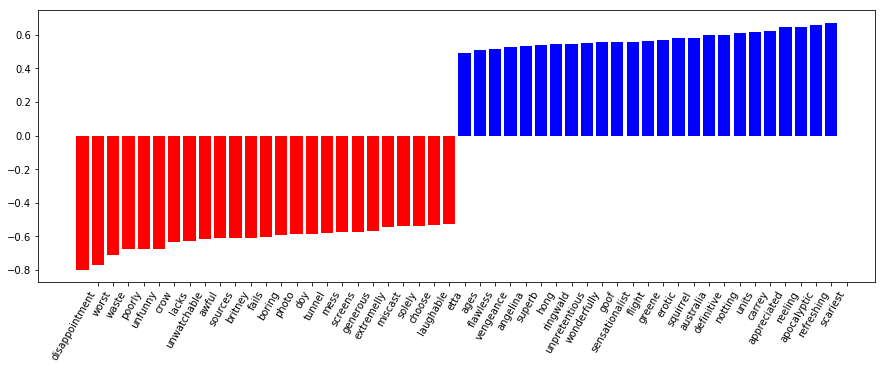

In [20]:
visualize_coefficients(svm, cv.get_feature_names())

In [21]:
from sklearn.pipeline import make_pipeline

text_pipe = make_pipeline(CountVectorizer(), LinearSVC())
with Timer():
    text_pipe.fit(text_train, y_train)
text_pipe.score(text_test, y_test)

Elapsed: 27s


0.84584000000000004

In [22]:
from sklearn.grid_search import GridSearchCV
print(svm.get_params().keys())
param_grid = {'linearsvc__C': np.logspace(-5, 0, 6)}
grid = GridSearchCV(text_pipe, param_grid, cv=5)
with Timer():
    grid.fit(text_train, y_train)

C:\Users\ritraina\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ritraina\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])
Elapsed: 11m 13s


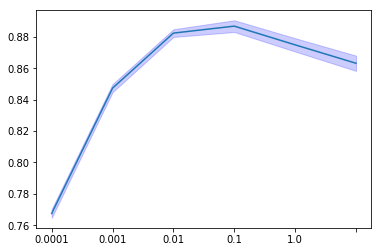

In [32]:
#from figures import plot_grid_1d
import matplotlib.pyplot as plt
import numpy as np

def plot_grid_1d(grid_search_cv, ax=None):
    if ax is None:
        ax = plt.gca()
    if len(grid_search_cv.param_grid.keys()) > 1:
        raise ValueError("More then one parameter found. Can't do 1d plot.")
        
    score_means, score_stds = zip(*[(np.mean(score.cv_validation_scores), np.std(score.cv_validation_scores))
                                for score in grid_search_cv.grid_scores_])
    score_means, score_stds = np.array(score_means), np.array(score_stds)
    parameters = list(grid_search_cv.param_grid.values())[0]
    artists = []
    artists.extend(ax.plot(score_means))
    artists.append(ax.fill_between(range(len(parameters)), score_means - score_stds,
                   score_means + score_stds, alpha=0.2, color="b"))
    ax.set_xticklabels(parameters)
    return artists
plot_grid_1d(grid)

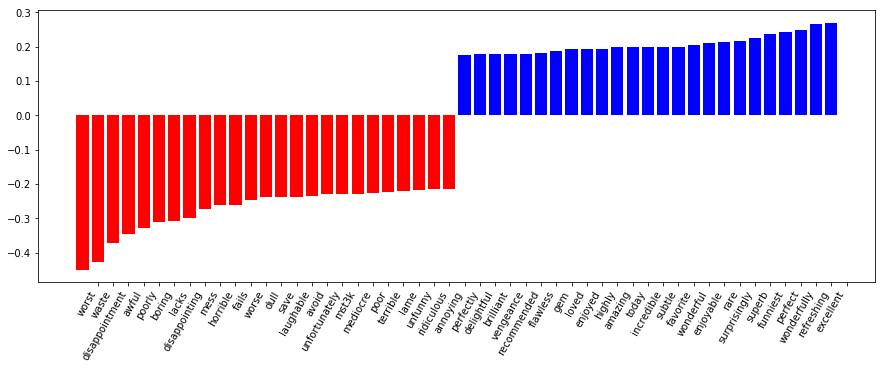

In [36]:
visualize_coefficients(grid.best_estimator_.named_steps['linearsvc'],
                      grid.best_estimator_.named_steps['countvectorizer'].get_feature_names())

In [37]:
grid.best_score_

0.8868

In [39]:
grid.score(text_test, y_test)

0.87587999999999999

Elapsed: 8m 13s


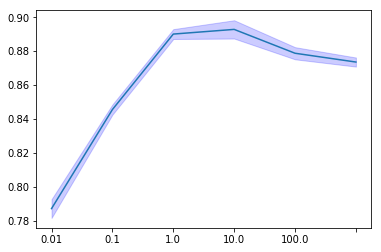

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_pipe = make_pipeline(TfidfVectorizer(), LinearSVC())

param_grid = {"linearsvc__C": np.logspace(-3, 2, 6)}
grid = GridSearchCV(tfidf_pipe, param_grid, cv=5)
with Timer():
    grid.fit(text_train, y_train)
plot_grid_1d(grid)

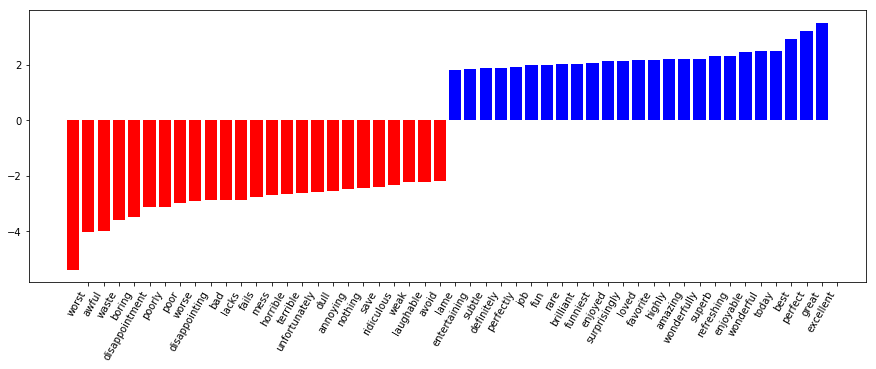

In [48]:
visualize_coefficients(grid.best_estimator_.named_steps['linearsvc'],
                      grid.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names())

In [49]:
grid.best_score_

0.89284

In [50]:
grid.score(text_test, y_test)

0.87719999999999998

## N- Grams

In [ ]:
text_pipe = make_pipeline(CountVectorizer(), LinearSVC())
param_grid = {'linearsvc__C': np.logspace(-3, 2, 6), 
              'countvectorizer__ngram_range': [(1,1), (1,2), (1,3)]}

grid = GridSearchCV(text_pipe, param_grid, cv = 5)
with Timer():
    grid.fit(text_train, y_train)

In [ ]:
scores = np.array([score.mean_validation_score for score in grid.grid_scores_]).reshape(3, -1)
plt.matshow(scores)
plt.ylabel("n-gram range")
plt.yticks(range(3), param_grid["countvectorizer_ngram_range"])
plt.xlabel("C")
plt.xticks(range(6), param_grid["linearsvc__C"]);
plt.colorbar()

In [ ]:
grid.best_params_

In [ ]:
visualize_coefficients(grid.best_estimator_.named_steps['linearsvc'],
                      grid.best_estimator_.named_steps['countvectorizer'].get_feature_names())

In [ ]:
grid.score(text_test, y_test)

## Look at the Natural Language Tool Kit (NLTK)

In [ ]:
# text feature extraction Hashing Tricks

from sklearn.feature_extraction.text import HashingVectorizer
hashing_vectorizer = HashingVectorizer()
X_hashed = hashing_vectorizer.transform(X)

In [ ]:
X_hashed 

In [ ]:
hashing_vectorizer = HashingVectorizer(ngram_range=(1,2))
X_hashed = hashing_vectorizer.transform(X)
X_hashed

In [ ]:
## Continuous distributed vector representation of words

In [ ]:
#Out of core and online Learning

In [ ]:
100000 * 2000

In [ ]:
float32_on_cheap_cloud = float32_on_laptops * 32 # 256gb cost 4$ / h
pritn(float32_on_cheap_cloud)

In [ ]:
#Subsample 

In [ ]:
<img src="subsample.svg"> 

In [ ]:
## Partial fit interface

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
import cPickle
from sklearn.linear_model imort SGDClassifier

sgd = SGDClassifier(random_state=0)

for i in range(9):
    X_batch, y_batch = cPickle.load(open("data/batch_%02d.pickle" % i))
    sgd.partial_fit(X_batch, y_batch, classes = range(10))

In [ ]:
X_test, y_test = cPickle.load(open("data/batch_09.pickle"))
sgd.score(X_test, y_test)

In [ ]:
sgd = SGDClassifier()

accuracies = [0]

for i in range(9):
    X_batch, y_batch = cPickle.load(open("data/batch_%02d.pickle" % i))
    if i > 0:
        accuracies.append(sgd.score(x_batch, y_batch))
    sgd.partial_fit(X_batch, y_batch, classes=range(10))

In [ ]:
plt.plot(accuracies)
plt.xlabel("batches seen")
plt.ylabel("generalization performance")

In [ ]:
import pandas as pd
csv_iterator = pd.read_csv("data/digits.csv", chunksize=100)

sgd = SGDClassifier()

for batch in csv_iterator:
    X = batch[batch.columns[:-1]]
    y = batch[batch.columns[-1]]
    sgd.partial_fit(X_batch, y_batch, classes = range(10))

In [ ]:
## Algorithms

In [ ]:
from slearn.utils.testing import all_estimators
for name, Class in all_estimators():
    if hashstr(Class, "partial_fit"):
        print("%s.%s" % (Class.__module__.split(".")[1], name))

In [ ]:
#Multiple iteratiosn

sgd = SGDClassifier(random_state = 0)
X_test, y_test = cPikcle.load(open("data/batch_09.pickle"))

accuracies = []

for itreation in range(20):
    for i in range(9):
        X_batch, y_batch = cPickle.load(open("data/batch_%02d.pickle" % i))
        sgd.partial_fit(X_batch, y_batch, classes = range(10))
    accuracies.append(sgd.score(X_test, y_test))

In [ ]:
plt.plot(accuracies)

In [ ]:
## kernel approximation for large scale Non linear learning

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selction import train_test_split
digits = load_digits()
X, y = digits.data / 16., digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV

grid = GridSearchCV(LinearSVC(random_state=0), param_grid=['C': np.logspace(-3, 2, 6), cv = 5])

with Timer():
    grid.fit(X_train, y_train)
grid.score(X_test, y_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

grid = GridSearchCV(SVC(random_state=0), 
                    param_grid={'C': np.logspace(-3, 2, 6), 
                    'gamma': np.logspace(-3, 2, 6)}, cv = 5)

with Timer():
    grid.fit(X_train, y_train)
grid.score(X_test, y_test)

In [ ]:
## kernel approximation + Linear SVM

In [ ]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline

pipe = mnake_pipeline(RBFSampler(random_state=0), LinearSVC(dual=False, random_state=0))

grid = GridSearchCV(pipe, param_grid=('linearscv__C': np.logspace(-3, 2, 6),
                                     'rbfsampler__gamma': np.logspace(-3, 2, 6)), cv=5)
with Timer():
    grid.fit(X_train, y_train)
grid.score(x_test, y_test)

In [ ]:
## Out of core Kernel Approximation

In [ ]:
import cPickle
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=0)

for iteration in range(30):
    for i in range(9):
        X_batch, y_batch = cPickle.load(open("data/batch_%02d.pickle" % i))
        sgd.partial_fit(X_batch, y_batch, classes = range(10))

In [ ]:
X_test, y_test = cPickle.load(open("data/batch_09.pickle"))
sgd.score(X_test, y_test)

In [ ]:
sgd = SGDClassifier(random_state=0)
rbf_sampler = RBFSampler(gamma=0.2, random_state=0).fit(np.ones((1, 64)))

for iteration in range(30):
    for i in range(9):
        x_batch, y_batch = cPickle.load(open"data/batch_%02d.pickle" % i)
        X_kernel = rbf_sampler.transform(X_batch)
        sgd.partial_fit(X_kernel, y_batch, classes = range(10))

In [ ]:
sgd.score(rbf_smaples.transform(X_test), y_test)

In [ ]:
### Transforming data using subsampling and supervised models

In [ ]:
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle

mnist = fetc_mldata("MNIST original")
X_train, X_test, mnist.data[:60000]/ 255., mnist.data[60000:] / 255.
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train.shaoe, X_test.shape

In [ ]:
## Base line using the whole dataset with the random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from helpers import Timer

rfc = RandomForestClassifier(n_estimators=100)
with Timer():
    rfc.fit(X_train, y_train)
    
rfc.score(X_test, y_test)

In [ ]:
### Baseline: using a linear model on the whole dataset

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(n_iter=10, random_state=0)

with Timer():
    rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

In [ ]:
## Baseline using a random forest on sub sampled data

In [ ]:
X_small, y_small = X_train[::100], y_train[::100]
print(X_small.shape)

In [ ]:
rfc = RandomForrestClassifier(n_estimators=100)

with Timer():
    rfc.fit(X_small, y_small)
rfc.score(X_test, y_test)

In [ ]:
## Using a supervised transformation 

In [ ]:
rfc.apply(X_small).shape

In [ ]:
rfc.apply(X_small)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder().fit(rfc.apply(X_small))
X_train_transformed = ohe.transform(rfc.apply(X_train))
X_train_transformed

In [ ]:
sgd = SGDClassifier(n_iter=10, random_satte=0)
with Timer():
    sgd.fit(X_train_transformed, y_train)
sgd.score(ohe.transform(rfc.apply(X_test)), y_test)

In [ ]:
## Out of core

In [ ]:
from sklearn.utils import gen_batches
sgd = SGDClassifier(random_state=0)

for i in range(10):
    for batch in gen_batces(len(X_train), batch_size=1000):
        X_batch = x_train[batch]
        y_batch = y_train[batch]
        X_batch_transformed = ohe.transform(rfc.apply(X_batch))
        sgd.partial_fit(X_batch_transformed, y_batch, classes = range(10))
sgd.score(ohe.transform(rfc.apply(X_test)), y_test)

In [ ]:
## out of core text clasification with the hashing vectorizer

In [ ]:
import os
print("file size: %d GB" % (os.path.getsize("data/reviews.txt")))

In [ ]:
with open("data/movies.txt") as f:
    print(f.read(4000))

In [ ]:
def review_iter(f):
    current_post = []
    for line in f.readlines():
        if line.starswith("product/productId"):
            if len(current_post):
                score = current_post[3].strip("review/score:").strip()
                review = " ".join(current_post[6:]).strip("review/text: ").strip()
                yield int(float(score)), review
            current_post = []
        else:
            current_post.append(line)
                    

In [ ]:
n_reeviews = 0
with open("data/movies.txt") as f:
    for r in review_iter(f):
        n_reviews += 1
print("Number of reviews: %d" % n_reviews)

In [ ]:
from itertolls import islice
with open("data/movies.txt") as f:
    revoews = islice(review_iter(f), 10000)
    scores, texts = zip(*reviews)
    
print(np.bincount(scores))

In [ ]:
from itertools import izip_longest
#from the itertools recepies

def grouper(iterable, n, fillvalue=None):
    "collect data into fixed length chunks or blocks"
    #grouper("ABCDEFG", 3, 'X) ..>ABC DEF gXX
    args = [iter(iterable)] * n
    return izip_longest(fillvalue=fillvalue, *args)

In [ ]:
def preprocessing_batch(reviews):
    review_filtered = [r for r in reviews if r is not None and r[0] != 3]
    scores, texts = zip(*review_filtered)
    polarity = np.array(scores) > 3
    return polarity, texts

In [ ]:
from sklearn.feature_extraction.text import Hashingvectorizer

vectorizer = HashingVectorizer(decode-error = "ignore")
with open("data/movies.txt") as f:
    reviews = islice(review_iter(f), 10000)
    polarity_test, texts_test = preprocess_batch(reviews)
    x_test = vectorizer.transform(texts_test)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=0)

accuracies = []

with open("data/movies.txt") as f:
    training_set = islice(review_iter(f), 1000, None)
    batch_iter = grouper(trainign_set, 10000)
    for batch in batch_iter:
        polarity, texts = preprocess_batch(batch)
        X = vectorizer.transform(texts)
        sgd.partial_fit(X, polarity, classes=[0,1])
        accuracies.append(sgd.score(X_test, polarity_test))

In [ ]:
plt.plot(accuracies)

In [ ]:
## Summary

scikit-learn APIs: Fit, Predict, score
cross_val_score, GridSearchCV
aspects of model selection - underfitting and overfitting-findng sweet spot
apply preprocessing steps, apply pipeline
scoring metrics: ROC curve, AUC curve, Confusion matrix and Accuracies
categorical data: label encoding, one hot encoding
Out of core learning